In [1]:
import graphlab
import matplotlib.pyplot as plt
%matplotlib inline

[INFO] This non-commercial license of GraphLab Create is assigned to chrisxie@cs.washington.edu and will expire on January 06, 2017. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-6764 - Server binary: /Users/ChrisXie/anaconda/envs/dato-env/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1454055538.log
[INFO] GraphLab Server Version: 1.8.1


In [2]:
loans = graphlab.SFrame('lending-club-data.gl/')

response = 'bad_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies 
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',
            'total_rec_int',
            'annual_inc',
            'funded_amnt',
            'funded_amnt_inv',
            'installment',
            'title',
           ]

loans, loans_with_na = loans[[response] + features].dropna_split()

print 'Dropping {} rows; keeping {} '.format(loans_with_na.num_rows(), 
                                             loans.num_rows())


Dropping 30 rows; keeping 122577 


# Subsample dataset to balance class distribution

It turns out that our data is disproportionally full of safe loans.

In [3]:
risky_loans = loans[loans['bad_loans'] == 1]
safe_loans = loans[loans['bad_loans'] == 0]

In [4]:
# SOLUTION
print "Percentage of safe loans:", len(safe_loans) / float(len(loans))
print "Percentage of risky loans:", len(risky_loans) / float(len(loans))

Percentage of safe loans: 0.811163595128
Percentage of risky loans: 0.188836404872


In [5]:
# Since there are less risky loans than safe loans, find the ratio of the sizes
# and use that percentage to undersample the safe loans.
percentage = len(risky_loans)/float(len(safe_loans))
safe_loans, throw_away = safe_loans.random_split(percentage, seed=0)
loans_data = risky_loans.append(safe_loans)

print "Percentage of safe loans:", len(safe_loans) / float(len(loans_data))
print "Percentage of risky loans:", len(risky_loans) / float(len(loans_data))
print "Total number of loans in our new dataset:", len(loans_data)

Percentage of safe loans: 0.498787406349
Percentage of risky loans: 0.501212593651
Total number of loans in our new dataset: 46182


# Split data into training and test

In [6]:
train_data, test_data = loans_data.random_split(.8, seed=0)

# Training and Plots

In [7]:
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [8]:
num_trees = 200
model = graphlab.boosted_trees_classifier.create(train_data, validation_set=test_data,
                                        target = response, features = features, max_iterations = num_trees,
                                        verbose=True, random_seed=0)

PROGRESS: Boosted trees classifier:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 36993
PROGRESS: Number of classes           : 2
PROGRESS: Number of feature columns   : 25
PROGRESS: Number of unpacked features : 25
PROGRESS: +-----------+--------------+-------------------+---------------------+
PROGRESS: | Iteration | Elapsed Time | Training-accuracy | Validation-accuracy |
PROGRESS: +-----------+--------------+-------------------+---------------------+
PROGRESS: | 1         | 1.186305     | 0.654394          | 0.647187            |
PROGRESS: | 2         | 1.226708     | 0.661774          | 0.657308            |
PROGRESS: | 3         | 1.274840     | 0.66764           | 0.657961            |
PROGRESS: | 4         | 1.315732     | 0.67083           | 0.659484            |
PROGRESS: | 5         | 1.360080     | 0.672506          | 0.662096            |
PROGRESS: | 6         | 1.411041     | 0.677615          | 0.664925        

In [9]:
out = '''PROGRESS: | 1         | 1.186305     | 0.654394          | 0.647187            |
PROGRESS: | 2         | 1.226708     | 0.661774          | 0.657308            |
PROGRESS: | 3         | 1.274840     | 0.66764           | 0.657961            |
PROGRESS: | 4         | 1.315732     | 0.67083           | 0.659484            |
PROGRESS: | 5         | 1.360080     | 0.672506          | 0.662096            |
PROGRESS: | 6         | 1.411041     | 0.677615          | 0.664925            |
PROGRESS: | 7         | 1.457710     | 0.681183          | 0.66449             |
PROGRESS: | 8         | 1.502493     | 0.685778          | 0.668734            |
PROGRESS: | 9         | 1.543104     | 0.689239          | 0.670258            |
PROGRESS: | 10        | 1.582704     | 0.693591          | 0.671999            |
PROGRESS: | 11        | 1.632389     | 0.699132          | 0.677005            |
PROGRESS: | 12        | 1.693193     | 0.700295          | 0.676352            |
PROGRESS: | 13        | 1.756566     | 0.705296          | 0.676787            |
PROGRESS: | 14        | 1.815295     | 0.706566          | 0.675373            |
PROGRESS: | 15        | 1.859002     | 0.70881           | 0.677876            |
PROGRESS: | 16        | 1.898281     | 0.710297          | 0.676896            |
PROGRESS: | 17        | 1.944575     | 0.712729          | 0.678746            |
PROGRESS: | 18        | 1.994740     | 0.714676          | 0.680705            |
PROGRESS: | 19        | 2.041006     | 0.715054          | 0.680923            |
PROGRESS: | 20        | 2.078743     | 0.717541          | 0.68114             |
PROGRESS: | 21        | 2.121050     | 0.720055          | 0.682338            |
PROGRESS: | 22        | 2.162401     | 0.722434          | 0.682338            |
PROGRESS: | 23        | 2.210469     | 0.72311           | 0.682773            |
PROGRESS: | 24        | 2.261164     | 0.723569          | 0.682991            |
PROGRESS: | 25        | 2.304338     | 0.725813          | 0.684841            |
PROGRESS: | 26        | 2.350172     | 0.727894          | 0.684732            |
PROGRESS: | 27        | 2.391460     | 0.729138          | 0.687126            |
PROGRESS: | 28        | 2.430703     | 0.730192          | 0.686255            |
PROGRESS: | 29        | 2.469249     | 0.730706          | 0.686038            |
PROGRESS: | 30        | 2.516531     | 0.73222           | 0.685494            |
PROGRESS: | 31        | 2.551608     | 0.732814          | 0.685494            |
PROGRESS: | 32        | 2.598871     | 0.735247          | 0.688541            |
PROGRESS: | 33        | 2.650710     | 0.736761          | 0.688541            |
PROGRESS: | 34        | 2.692455     | 0.739437          | 0.689302            |
PROGRESS: | 35        | 2.733310     | 0.7416            | 0.689738            |
PROGRESS: | 36        | 2.774145     | 0.742978          | 0.689738            |
PROGRESS: | 37        | 2.815332     | 0.743573          | 0.690173            |
PROGRESS: | 38        | 2.856047     | 0.743925          | 0.689847            |
PROGRESS: | 39        | 2.892494     | 0.744168          | 0.689847            |
PROGRESS: | 40        | 2.941574     | 0.744195          | 0.689302            |
PROGRESS: | 41        | 2.994850     | 0.746195          | 0.689847            |
PROGRESS: | 42        | 3.039361     | 0.74752           | 0.689955            |
PROGRESS: | 43        | 3.083537     | 0.749493          | 0.690717            |
PROGRESS: | 44        | 3.123128     | 0.749682          | 0.691152            |
PROGRESS: | 45        | 3.172278     | 0.749655          | 0.69137             |
PROGRESS: | 46        | 3.211329     | 0.751548          | 0.691697            |
PROGRESS: | 47        | 3.259053     | 0.752196          | 0.691261            |
PROGRESS: | 48        | 3.312174     | 0.754386          | 0.69137             |
PROGRESS: | 49        | 3.369726     | 0.754954          | 0.690826            |
PROGRESS: | 50        | 3.424124     | 0.755602          | 0.690064            |
PROGRESS: | 51        | 3.479756     | 0.756035          | 0.690391            |
PROGRESS: | 52        | 3.536720     | 0.75644           | 0.690717            |
PROGRESS: | 53        | 3.574789     | 0.756711          | 0.691044            |
PROGRESS: | 54        | 3.617027     | 0.758225          | 0.690173            |
PROGRESS: | 55        | 3.655949     | 0.758576          | 0.690173            |
PROGRESS: | 56        | 3.692639     | 0.758792          | 0.690173            |
PROGRESS: | 57        | 3.732795     | 0.758954          | 0.690391            |
PROGRESS: | 58        | 3.786185     | 0.759306          | 0.689738            |
PROGRESS: | 59        | 3.833363     | 0.759982          | 0.68952             |
PROGRESS: | 60        | 3.877458     | 0.761063          | 0.690826            |
PROGRESS: | 61        | 3.918702     | 0.761387          | 0.690717            |
PROGRESS: | 62        | 3.956111     | 0.761522          | 0.691479            |
PROGRESS: | 63        | 3.994273     | 0.761685          | 0.691044            |
PROGRESS: | 64        | 4.030421     | 0.761766          | 0.690173            |
PROGRESS: | 65        | 4.069801     | 0.761955          | 0.690064            |
PROGRESS: | 66        | 4.107090     | 0.762144          | 0.689955            |
PROGRESS: | 67        | 4.145951     | 0.762279          | 0.689629            |
PROGRESS: | 68        | 4.188093     | 0.762739          | 0.689629            |
PROGRESS: | 69        | 4.229583     | 0.763577          | 0.690173            |
PROGRESS: | 70        | 4.269835     | 0.765172          | 0.691044            |
PROGRESS: | 71        | 4.315887     | 0.765631          | 0.690282            |
PROGRESS: | 72        | 4.358578     | 0.766415          | 0.689194            |
PROGRESS: | 73        | 4.404275     | 0.768335          | 0.689955            |
PROGRESS: | 74        | 4.444866     | 0.768713          | 0.690391            |
PROGRESS: | 75        | 4.494276     | 0.769497          | 0.690282            |
PROGRESS: | 76        | 4.538978     | 0.769659          | 0.689847            |
PROGRESS: | 77        | 4.584582     | 0.769794          | 0.689847            |
PROGRESS: | 78        | 4.623242     | 0.769902          | 0.689955            |
PROGRESS: | 79        | 4.655585     | 0.769956          | 0.689847            |
PROGRESS: | 80        | 4.694884     | 0.770038          | 0.689847            |
PROGRESS: | 81        | 4.740367     | 0.770065          | 0.689738            |
PROGRESS: | 82        | 4.777315     | 0.770632          | 0.689411            |
PROGRESS: | 83        | 4.816292     | 0.770767          | 0.689411            |
PROGRESS: | 84        | 4.853775     | 0.770876          | 0.689085            |
PROGRESS: | 85        | 4.887950     | 0.770957          | 0.688867            |
PROGRESS: | 86        | 4.923659     | 0.771227          | 0.688976            |
PROGRESS: | 87        | 4.964947     | 0.771551          | 0.689085            |
PROGRESS: | 88        | 5.004336     | 0.772092          | 0.688649            |
PROGRESS: | 89        | 5.043327     | 0.772768          | 0.689955            |
PROGRESS: | 90        | 5.086885     | 0.774146          | 0.691588            |
PROGRESS: | 91        | 5.123898     | 0.774255          | 0.692023            |
PROGRESS: | 92        | 5.169768     | 0.774255          | 0.692023            |
PROGRESS: | 93        | 5.207699     | 0.774363          | 0.692023            |
PROGRESS: | 94        | 5.245672     | 0.774579          | 0.692132            |
PROGRESS: | 95        | 5.287000     | 0.774714          | 0.692241            |
PROGRESS: | 96        | 5.329854     | 0.774741          | 0.692132            |
PROGRESS: | 97        | 5.368157     | 0.77512           | 0.692458            |
PROGRESS: | 98        | 5.416668     | 0.775282          | 0.692241            |
PROGRESS: | 99        | 5.461478     | 0.775282          | 0.692132            |
PROGRESS: | 100       | 5.501609     | 0.775282          | 0.692023            |
PROGRESS: | 101       | 5.551048     | 0.776228          | 0.692241            |
PROGRESS: | 102       | 5.592449     | 0.776444          | 0.69235             |
PROGRESS: | 103       | 5.628974     | 0.776579          | 0.692458            |
PROGRESS: | 104       | 5.671083     | 0.776687          | 0.692458            |
PROGRESS: | 105       | 5.706232     | 0.776687          | 0.692567            |
PROGRESS: | 106       | 5.741693     | 0.776579          | 0.692567            |
PROGRESS: | 107       | 5.776525     | 0.776796          | 0.692676            |
PROGRESS: | 108       | 5.812881     | 0.776769          | 0.692785            |
PROGRESS: | 109       | 5.850905     | 0.776985          | 0.692676            |
PROGRESS: | 110       | 5.884296     | 0.777012          | 0.692676            |
PROGRESS: | 111       | 5.920306     | 0.776931          | 0.692458            |
PROGRESS: | 112       | 5.965760     | 0.77739           | 0.692132            |
PROGRESS: | 113       | 6.013398     | 0.779012          | 0.691261            |
PROGRESS: | 114       | 6.052732     | 0.780553          | 0.690935            |
PROGRESS: | 115       | 6.101835     | 0.781553          | 0.691805            |
PROGRESS: | 116       | 6.140225     | 0.782256          | 0.69137             |
PROGRESS: | 117       | 6.177419     | 0.782635          | 0.691261            |
PROGRESS: | 118       | 6.211678     | 0.782608          | 0.691152            |
PROGRESS: | 119       | 6.248482     | 0.78331           | 0.691479            |
PROGRESS: | 120       | 6.291461     | 0.783554          | 0.691044            |
PROGRESS: | 121       | 6.331591     | 0.783743          | 0.690608            |
PROGRESS: | 122       | 6.375700     | 0.783932          | 0.690935            |
PROGRESS: | 123       | 6.411693     | 0.784608          | 0.690717            |
PROGRESS: | 124       | 6.453980     | 0.785987          | 0.68952             |
PROGRESS: | 125       | 6.509071     | 0.786527          | 0.689085            |
PROGRESS: | 126       | 6.546766     | 0.786662          | 0.688976            |
PROGRESS: | 127       | 6.584014     | 0.787176          | 0.688649            |
PROGRESS: | 128       | 6.621514     | 0.787798          | 0.688323            |
PROGRESS: | 129       | 6.657264     | 0.78769           | 0.688432            |
PROGRESS: | 130       | 6.698148     | 0.787879          | 0.688323            |
PROGRESS: | 131       | 6.741447     | 0.787933          | 0.688214            |
PROGRESS: | 132       | 6.782113     | 0.787933          | 0.688214            |
PROGRESS: | 133       | 6.821136     | 0.788014          | 0.688105            |
PROGRESS: | 134       | 6.867509     | 0.788068          | 0.687997            |
PROGRESS: | 135       | 6.914700     | 0.78823           | 0.68767             |
PROGRESS: | 136       | 6.963244     | 0.788771          | 0.687452            |
PROGRESS: | 137       | 7.003850     | 0.788798          | 0.687452            |
PROGRESS: | 138       | 7.043394     | 0.788987          | 0.687779            |
PROGRESS: | 139       | 7.080980     | 0.789555          | 0.687344            |
PROGRESS: | 140       | 7.117268     | 0.789663          | 0.687126            |
PROGRESS: | 141       | 7.179486     | 0.790231          | 0.687344            |
PROGRESS: | 142       | 7.229917     | 0.791528          | 0.687017            |
PROGRESS: | 143       | 7.271473     | 0.791717          | 0.687017            |
PROGRESS: | 144       | 7.313292     | 0.792069          | 0.687344            |
PROGRESS: | 145       | 7.349747     | 0.792772          | 0.687452            |
PROGRESS: | 146       | 7.398499     | 0.794123          | 0.68767             |
PROGRESS: | 147       | 7.436629     | 0.794312          | 0.687126            |
PROGRESS: | 148       | 7.483205     | 0.794394          | 0.686908            |
PROGRESS: | 149       | 7.525772     | 0.794448          | 0.686908            |
PROGRESS: | 150       | 7.560427     | 0.794529          | 0.687126            |
PROGRESS: | 151       | 7.602558     | 0.79461           | 0.687017            |
PROGRESS: | 152       | 7.644179     | 0.79488           | 0.686908            |
PROGRESS: | 153       | 7.687090     | 0.794907          | 0.686799            |
PROGRESS: | 154       | 7.720549     | 0.794961          | 0.686908            |
PROGRESS: | 155       | 7.762758     | 0.795015          | 0.686908            |
PROGRESS: | 156       | 7.812948     | 0.795042          | 0.686799            |
PROGRESS: | 157       | 7.856782     | 0.795015          | 0.686799            |
PROGRESS: | 158       | 7.893207     | 0.795015          | 0.686908            |
PROGRESS: | 159       | 7.940284     | 0.79515           | 0.686908            |
PROGRESS: | 160       | 7.984269     | 0.795232          | 0.686799            |
PROGRESS: | 161       | 8.023302     | 0.79534           | 0.686908            |
PROGRESS: | 162       | 8.072899     | 0.795421          | 0.686799            |
PROGRESS: | 163       | 8.123064     | 0.795772          | 0.686691            |
PROGRESS: | 164       | 8.164184     | 0.79634           | 0.686908            |
PROGRESS: | 165       | 8.203151     | 0.796502          | 0.687017            |
PROGRESS: | 166       | 8.242735     | 0.796637          | 0.686908            |
PROGRESS: | 167       | 8.286717     | 0.796772          | 0.686799            |
PROGRESS: | 168       | 8.330248     | 0.797583          | 0.687017            |
PROGRESS: | 169       | 8.383962     | 0.797637          | 0.686908            |
PROGRESS: | 170       | 8.431112     | 0.797475          | 0.687126            |
PROGRESS: | 171       | 8.469464     | 0.798286          | 0.688105            |
PROGRESS: | 172       | 8.509026     | 0.798313          | 0.687997            |
PROGRESS: | 173       | 8.548600     | 0.798692          | 0.68767             |
PROGRESS: | 174       | 8.604253     | 0.799908          | 0.688214            |
PROGRESS: | 175       | 8.653159     | 0.800584          | 0.688649            |
PROGRESS: | 176       | 8.702499     | 0.801395          | 0.688867            |
PROGRESS: | 177       | 8.741564     | 0.8018            | 0.688432            |
PROGRESS: | 178       | 8.790697     | 0.801881          | 0.688649            |
PROGRESS: | 179       | 8.835317     | 0.802692          | 0.688432            |
PROGRESS: | 180       | 8.882981     | 0.803882          | 0.688541            |
PROGRESS: | 181       | 8.922648     | 0.804666          | 0.68952             |
PROGRESS: | 182       | 8.962492     | 0.80472           | 0.68952             |
PROGRESS: | 183       | 9.004861     | 0.804828          | 0.689411            |
PROGRESS: | 184       | 9.040125     | 0.804801          | 0.689411            |
PROGRESS: | 185       | 9.076991     | 0.80499           | 0.688976            |
PROGRESS: | 186       | 9.114837     | 0.804963          | 0.689302            |
PROGRESS: | 187       | 9.156589     | 0.804963          | 0.68952             |
PROGRESS: | 188       | 9.207705     | 0.80499           | 0.689194            |
PROGRESS: | 189       | 9.255411     | 0.805206          | 0.68952             |
PROGRESS: | 190       | 9.292907     | 0.805233          | 0.68952             |
PROGRESS: | 191       | 9.331463     | 0.80526           | 0.689738            |
PROGRESS: | 192       | 9.367507     | 0.805423          | 0.689629            |
PROGRESS: | 193       | 9.409046     | 0.806044          | 0.68952             |
PROGRESS: | 194       | 9.454205     | 0.806234          | 0.689738            |
PROGRESS: | 195       | 9.493914     | 0.806342          | 0.689738            |
PROGRESS: | 196       | 9.532128     | 0.806396          | 0.689738            |
PROGRESS: | 197       | 9.574514     | 0.806423          | 0.68952             |
PROGRESS: | 198       | 9.611385     | 0.806396          | 0.68952             |
PROGRESS: | 199       | 9.648386     | 0.806423          | 0.68952             |
PROGRESS: | 200       | 9.683890     | 0.806558          | 0.689955'''
out = out.split()

In [10]:
test_error = []
training_error = []
for i in range(num_trees):
    test_error.append(1 - float(out[-1 + i * -10]))
    training_error.append(1 - float(out[-3 + i * -10]))
test_error = test_error[::-1]
training_error = training_error[::-1]

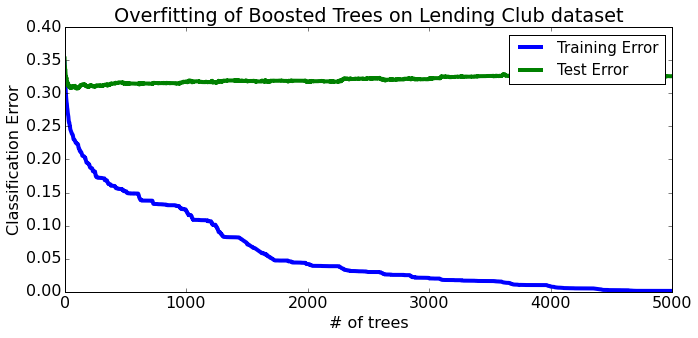

In [38]:
plt.plot(training_error, linewidth=4.0, label='Training Error')
plt.plot(test_error, linewidth=4.0, label='Test Error')

make_figure(dim=(10,5), title='Overfitting of Boosted Trees on Lending Club dataset',
            xlabel='# of trees',
            ylabel='Classification Error',
            legend='upper right')

# plt.savefig('boosted_overfitting.png', dpi=200)